# Kaggle Project
### Name: Yutong Shao
### UID: 6735684, User name: Claireyt

In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import plot_roc_curve, roc_auc_score, f1_score, confusion_matrix
import time

import warnings
warnings.filterwarnings('ignore')

In [569]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [570]:
print(train.shape)
train.head()

(1340, 35)


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1317087,40,No,Travel_Rarely,1398,Cardiology,2,4,Life Sciences,1,...,4,80,0,21,2,3,20,15,1,12
1,1548175,40,No,Travel_Rarely,1300,Maternity,24,2,Technical Degree,1,...,1,80,2,9,3,3,9,8,4,7
2,1215433,25,No,Travel_Rarely,622,Cardiology,13,1,Medical,1,...,3,80,0,7,1,3,7,4,0,6
3,1375351,33,No,Travel_Rarely,922,Maternity,1,5,Medical,1,...,3,80,1,10,2,3,6,1,0,5
4,1028734,39,No,Travel_Frequently,505,Maternity,2,4,Technical Degree,1,...,4,80,0,20,1,3,19,6,11,8


In [571]:
print(test.shape)
test.head()

(336, 34)


,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1628396,42,Travel_Rarely,855,Maternity,12,3,Medical,1,2,...,2,80,3,7,6,2,5,3,0,4
1,1658398,29,Travel_Rarely,906,Maternity,10,3,Life Sciences,1,4,...,3,80,0,3,5,3,0,0,0,0
2,1520532,38,Non-Travel,1327,Cardiology,2,2,Life Sciences,1,4,...,4,80,1,13,0,3,8,7,7,5
3,1410589,25,Travel_Rarely,240,Cardiology,5,3,Marketing,1,3,...,4,80,0,6,1,3,6,4,0,3
4,1309082,29,Travel_Rarely,352,Neurology,6,1,Medical,1,4,...,4,80,0,1,3,3,1,0,0,0


# Data description and visualization

In [572]:
def DescribeData(dataframe):
    print('\n', '-' * 20, 'shape'.upper(), 20 * '-')
    print(dataframe.shape)
    print('\n', '-' * 20, 'dtypes'.upper(), 20 * '-')
    print(dataframe.dtypes)
    print('\n', '-' * 20, 'columns'.upper(), 20 * '-')
    print(dataframe.columns)
    print('\n', '-' * 20, 'info'.upper(), 20 * '-')
    print(dataframe.info())
    print('\n', '-' * 20, 'any null values'.upper(), 20 * '-')
    print(dataframe.isnull().values.any())
    print('\n', '-' * 20, 'null values'.upper(), 20 * '-')
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print('\n', '-' * 20, 'descriptive statistics'.upper(), 20 * '-')
    print(dataframe.describe())


DescribeData(train)


 -------------------- SHAPE --------------------
(1340, 35)

 -------------------- DTYPES --------------------
EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipS

In [573]:
# print(dataframe.describe().to_latex(index=False))

In [574]:
def FindNumOrCategFeature(dataframe, dtype):
    '''''
    Report the numerical or categorical features
    for the dataframe. 
    dtype = 'numerical' or 'categorical' or 'both'
    '''''
    # categorical features
    cate = (dataframe.dtypes == 'object')
    categorical = list(cate[cate].index)
    
    # numerical features
    num = (dataframe.dtypes == 'int64')
    nums = list(num[num].index)
    
    if dtype == 'numerical':
        print('Categorical featrues:')
        print(categorical)
        
    elif dtype == 'categorical':
        print('Numerical featrues:')
        print(nums)
        
    elif dtype == 'both':
        print('Categorical featrues:')
        print(categorical)
        print('Numerical featrues:')
        print(nums)
    
    return categorical, nums
        
        
cates, nums = FindNumOrCategFeature(train, 'both')        

Categorical featrues:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical featrues:
['EmployeeID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Categorical data

In [575]:
def DescribeCateFeature(dataframe, categorical, plot=False):
    
    print('\n', '-' * 10, categorical.upper(), 10 * '-')
    print(pd.DataFrame({
        categorical: dataframe[categorical].value_counts(),
        'RATIO (%)': round(100 * (dataframe[categorical].value_counts() / len(dataframe)), 2)
    }))

    if plot == True:
        sns.countplot(x=dataframe[categorical], palette='Paired')
        plt.ylabel('COUNT')
        plt.xlabel(categorical.upper())
        plt.show()

    


 ---------- ATTRITION ----------
     Attrition  RATIO (%)
No        1181      88.13
Yes        159      11.87


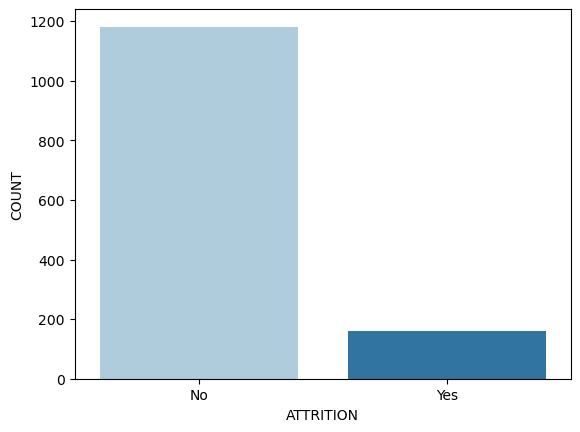


 ---------- BUSINESSTRAVEL ----------
                   BusinessTravel  RATIO (%)
Travel_Rarely                 946      70.60
Travel_Frequently             259      19.33
Non-Travel                    135      10.07


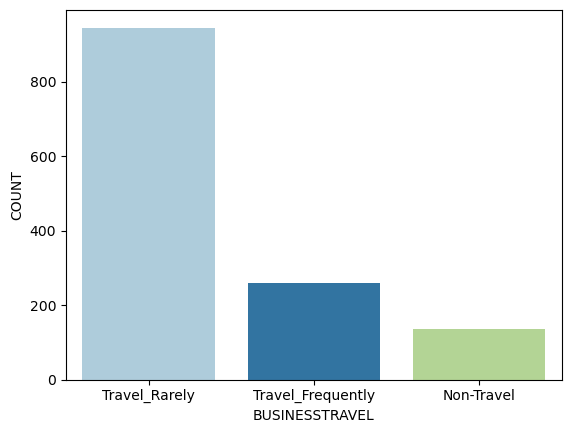


 ---------- DEPARTMENT ----------
            Department  RATIO (%)
Maternity          644      48.06
Cardiology         413      30.82
Neurology          283      21.12


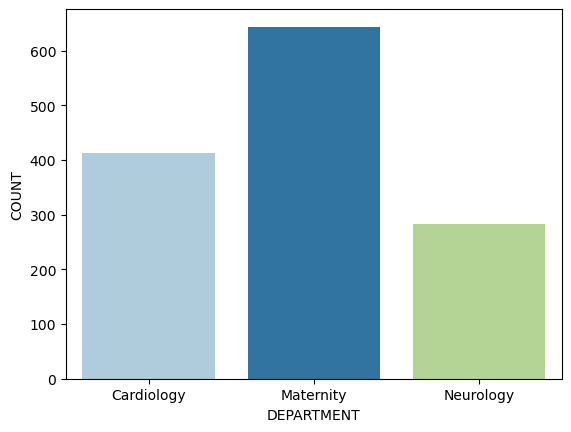


 ---------- EDUCATIONFIELD ----------
                  EducationField  RATIO (%)
Life Sciences                567      42.31
Medical                      404      30.15
Marketing                    150      11.19
Technical Degree             121       9.03
Other                         75       5.60
Human Resources               23       1.72


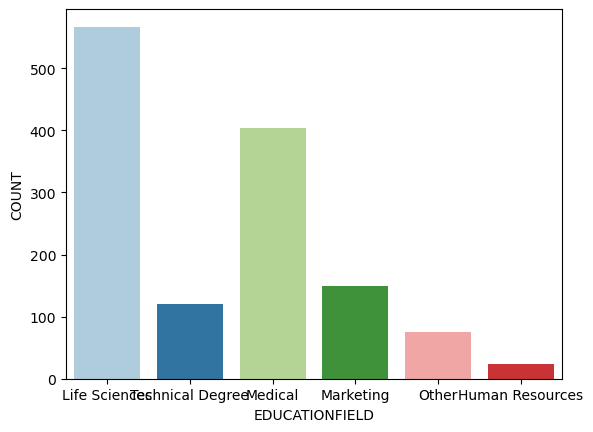


 ---------- GENDER ----------
        Gender  RATIO (%)
Male       796       59.4
Female     544       40.6


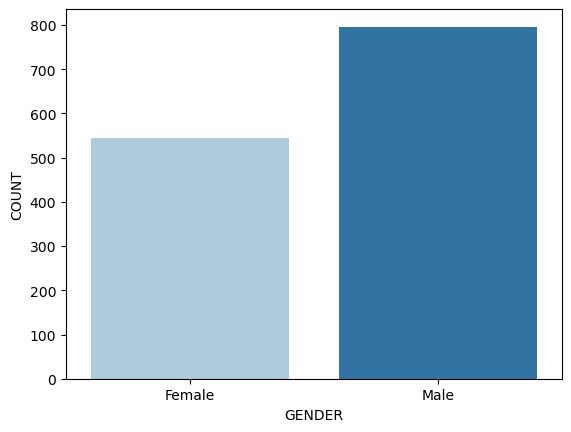


 ---------- JOBROLE ----------
                JobRole  RATIO (%)
Nurse               651      48.58
Other               434      32.39
Therapist           152      11.34
Administrative       91       6.79
Admin                12       0.90


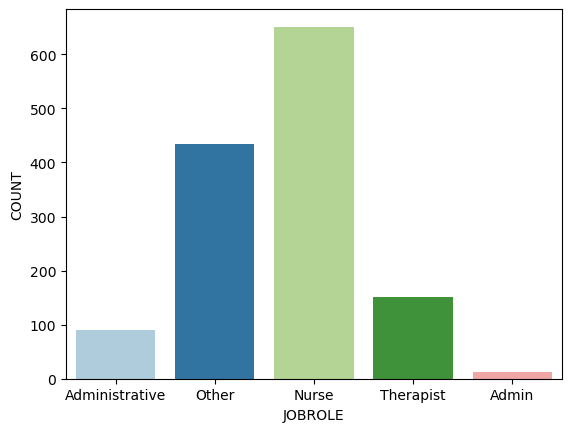


 ---------- MARITALSTATUS ----------
          MaritalStatus  RATIO (%)
Married             620      46.27
Single              424      31.64
Divorced            296      22.09


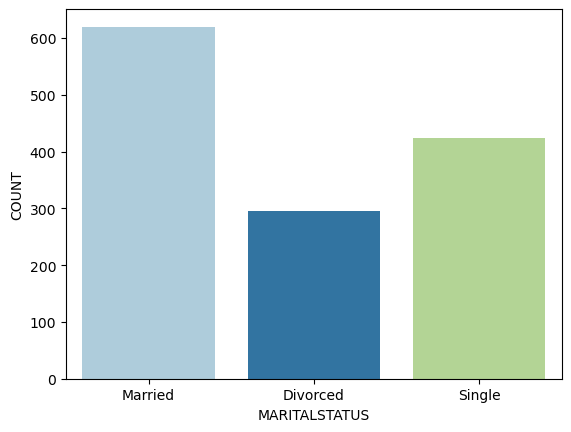


 ---------- OVER18 ----------
   Over18  RATIO (%)
Y    1340      100.0


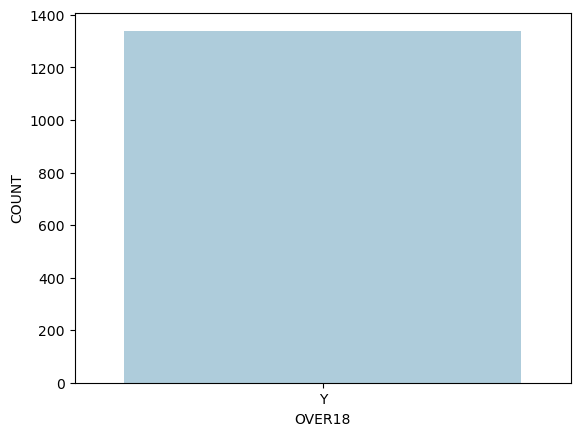


 ---------- OVERTIME ----------
     OverTime  RATIO (%)
No        954      71.19
Yes       386      28.81


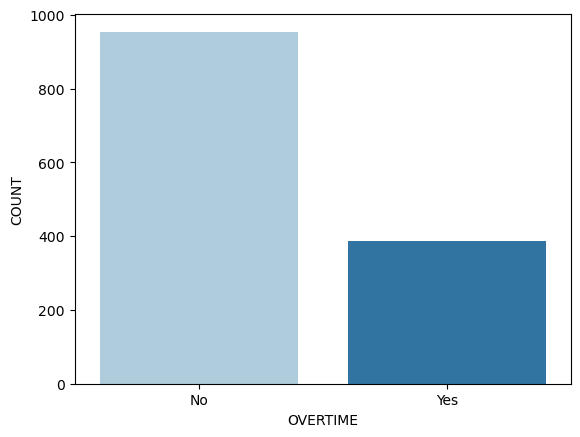

In [576]:
for c in cates:
    DescribeCateFeature(dataframe=train, categorical=c, plot=True)

## Numerical data

In [577]:
def DescribeNumericalData(dataframe, cols, plot=False):
    
    print('\n', '-' * 10, cols.upper(), '-' * 10)
    print(pd.DataFrame({
        cols.upper(): round(dataframe[cols].describe().T, 2)
    }))

    if plot == True:
        plt.figure(figsize=(8, 3))
        plt.subplot(1, 2, 1)
        sns.boxplot(y=dataframe[cols], palette='Paired')
        plt.ylabel(cols.upper())
        plt.subplot(1, 2, 2)
        sns.histplot(x=dataframe[cols], palette='Paired')
        plt.xlabel(cols.upper())
        plt.show()


 ---------- EMPLOYEEID ----------
       EMPLOYEEID
count     1340.00
mean   1460265.49
std     249482.07
min    1025177.00
25%    1237599.25
50%    1469861.50
75%    1670131.00
max    1886378.00


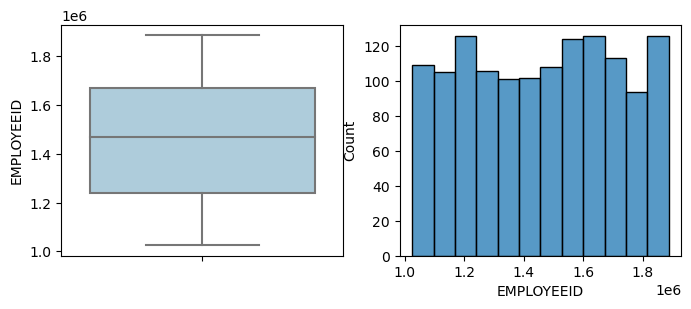


 ---------- AGE ----------
           AGE
count  1340.00
mean     36.58
std       9.01
min      18.00
25%      30.00
50%      35.00
75%      42.00
max      60.00


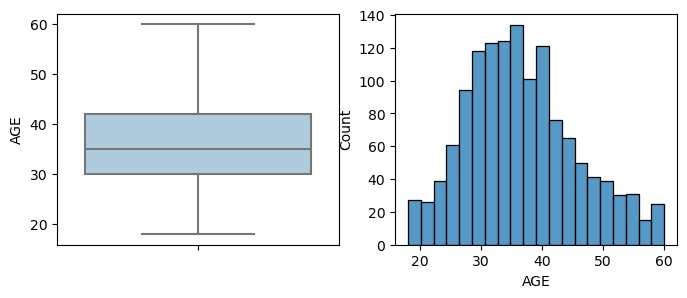


 ---------- DAILYRATE ----------
       DAILYRATE
count    1340.00
mean      799.20
std       399.33
min       102.00
25%       465.00
50%       796.00
75%      1153.00
max      1499.00


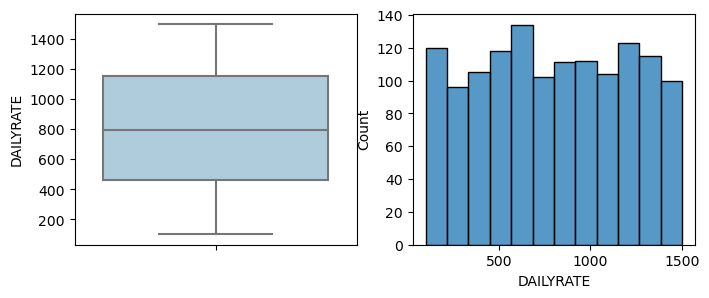


 ---------- DISTANCEFROMHOME ----------
       DISTANCEFROMHOME
count           1340.00
mean               9.19
std                8.14
min                1.00
25%                2.00
50%                7.00
75%               14.00
max               29.00


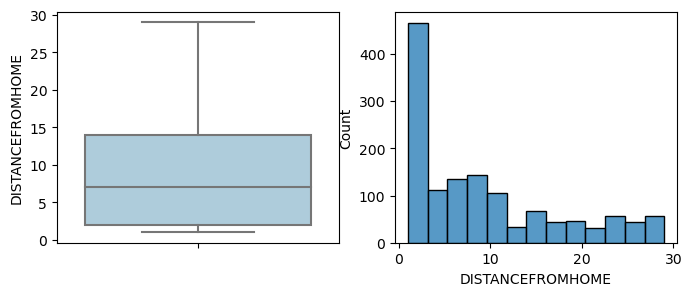


 ---------- EDUCATION ----------
       EDUCATION
count    1340.00
mean        2.92
std         1.04
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         5.00


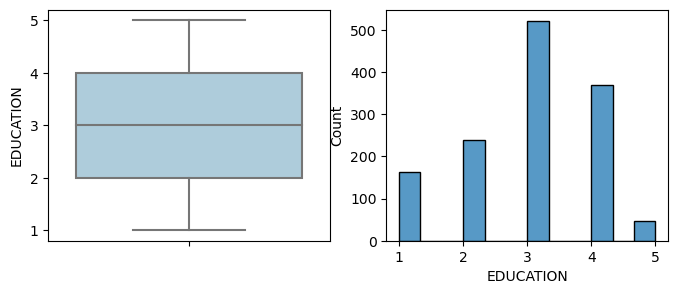


 ---------- EMPLOYEECOUNT ----------
       EMPLOYEECOUNT
count         1340.0
mean             1.0
std              0.0
min              1.0
25%              1.0
50%              1.0
75%              1.0
max              1.0


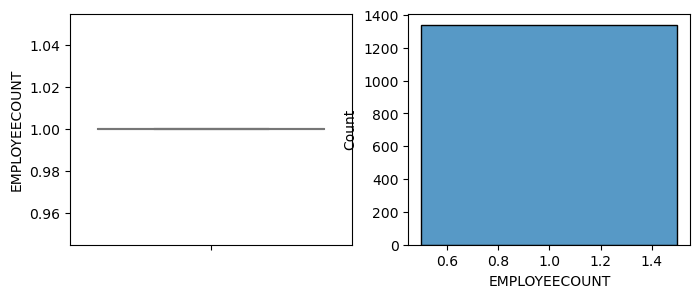


 ---------- ENVIRONMENTSATISFACTION ----------
       ENVIRONMENTSATISFACTION
count                  1340.00
mean                      2.71
std                       1.10
min                       1.00
25%                       2.00
50%                       3.00
75%                       4.00
max                       4.00


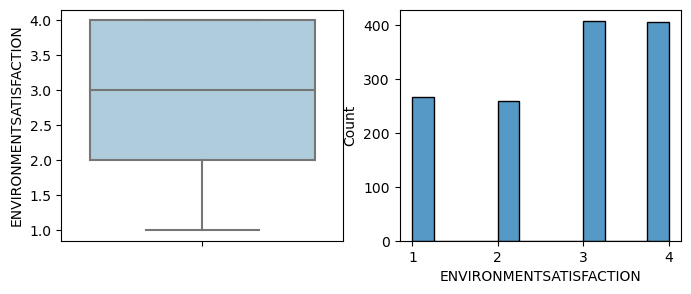


 ---------- HOURLYRATE ----------
       HOURLYRATE
count     1340.00
mean        65.56
std         20.34
min         30.00
25%         48.00
50%         65.00
75%         83.00
max        100.00


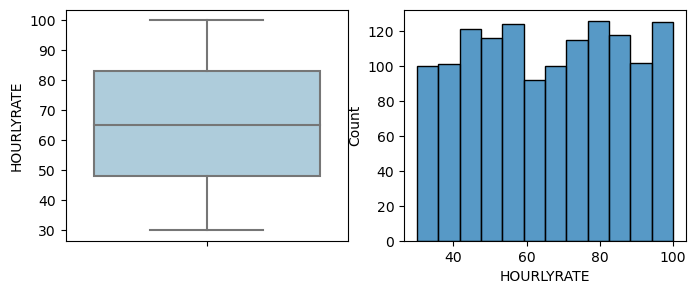


 ---------- JOBINVOLVEMENT ----------
       JOBINVOLVEMENT
count         1340.00
mean             2.72
std              0.72
min              1.00
25%              2.00
50%              3.00
75%              3.00
max              4.00


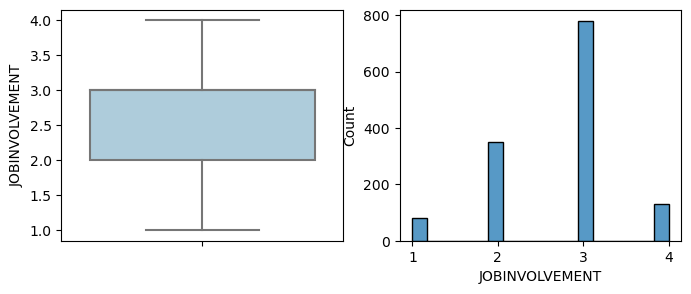


 ---------- JOBLEVEL ----------
       JOBLEVEL
count   1340.00
mean       2.05
std        1.10
min        1.00
25%        1.00
50%        2.00
75%        3.00
max        5.00


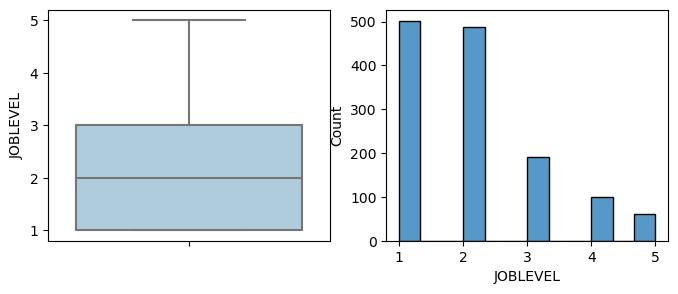


 ---------- JOBSATISFACTION ----------
       JOBSATISFACTION
count          1340.00
mean              2.75
std               1.11
min               1.00
25%               2.00
50%               3.00
75%               4.00
max               4.00


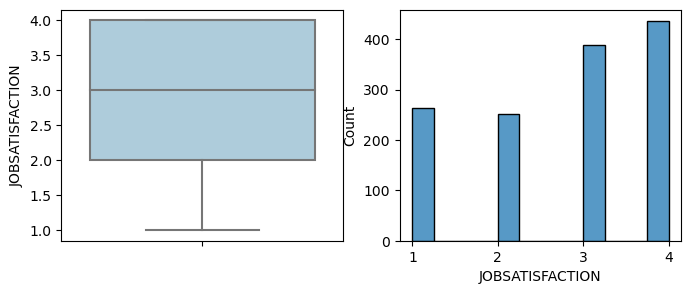


 ---------- MONTHLYINCOME ----------
       MONTHLYINCOME
count        1340.00
mean         6433.38
std          4687.06
min          1051.00
25%          2870.00
50%          4876.50
75%          8038.75
max         19973.00


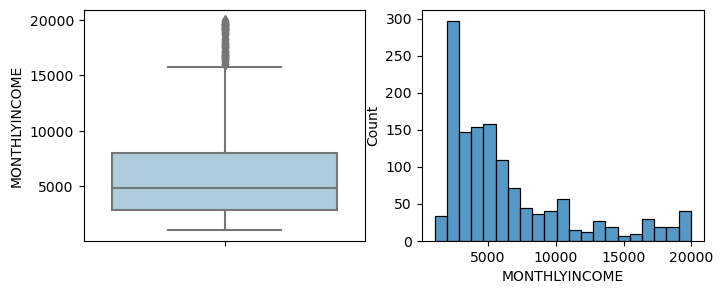


 ---------- MONTHLYRATE ----------
       MONTHLYRATE
count      1340.00
mean      14290.38
std        7167.00
min        2094.00
25%        7967.25
50%       14288.50
75%       20472.50
max       26997.00


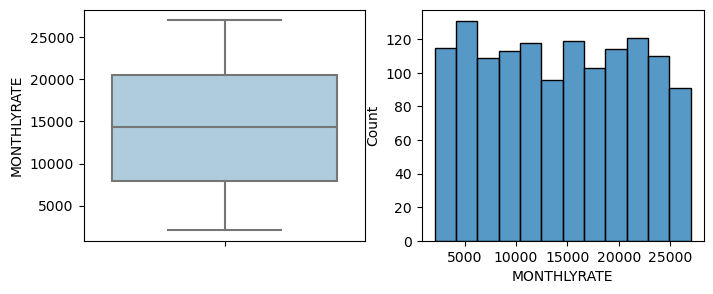


 ---------- NUMCOMPANIESWORKED ----------
       NUMCOMPANIESWORKED
count             1340.00
mean                 2.60
std                  2.47
min                  0.00
25%                  1.00
50%                  1.00
75%                  4.00
max                  9.00


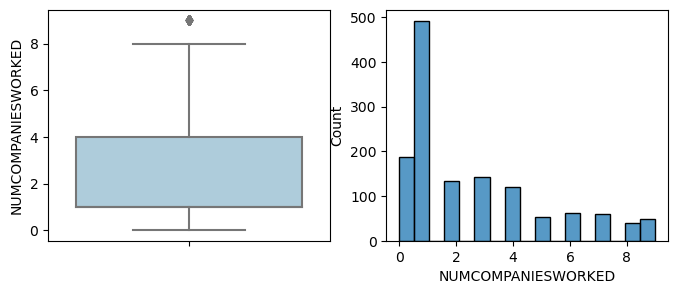


 ---------- PERCENTSALARYHIKE ----------
       PERCENTSALARYHIKE
count            1340.00
mean               15.17
std                 3.66
min                11.00
25%                12.00
50%                14.00
75%                18.00
max                25.00


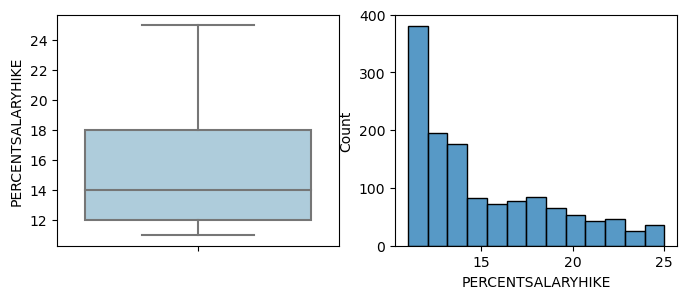


 ---------- PERFORMANCERATING ----------
       PERFORMANCERATING
count            1340.00
mean                3.15
std                 0.36
min                 3.00
25%                 3.00
50%                 3.00
75%                 3.00
max                 4.00


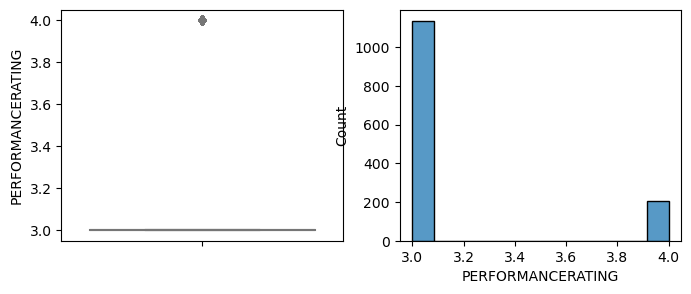


 ---------- RELATIONSHIPSATISFACTION ----------
       RELATIONSHIPSATISFACTION
count                   1340.00
mean                       2.70
std                        1.08
min                        1.00
25%                        2.00
50%                        3.00
75%                        4.00
max                        4.00


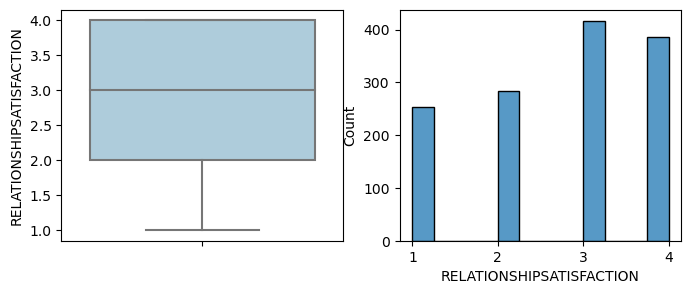


 ---------- STANDARDHOURS ----------
       STANDARDHOURS
count         1340.0
mean            80.0
std              0.0
min             80.0
25%             80.0
50%             80.0
75%             80.0
max             80.0


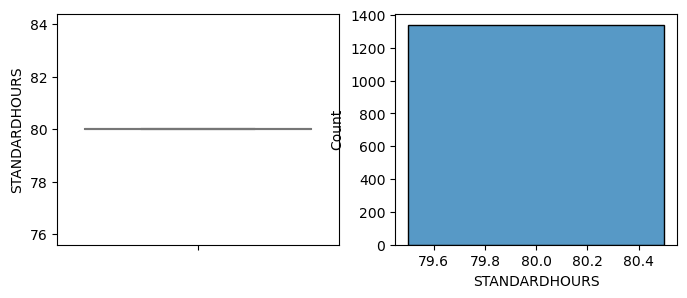


 ---------- SHIFT ----------
         SHIFT
count  1340.00
mean      0.81
std       0.86
min       0.00
25%       0.00
50%       1.00
75%       1.00
max       3.00


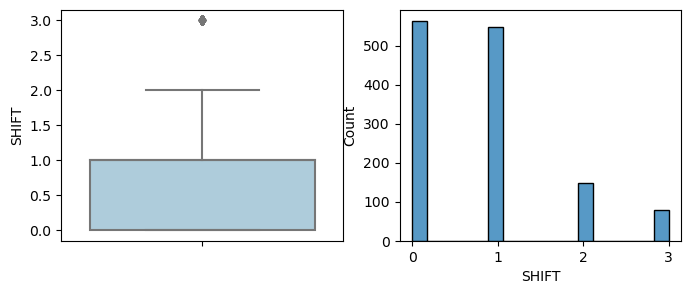


 ---------- TOTALWORKINGYEARS ----------
       TOTALWORKINGYEARS
count            1340.00
mean               11.22
std                 7.70
min                 0.00
25%                 6.00
50%                10.00
75%                15.00
max                40.00


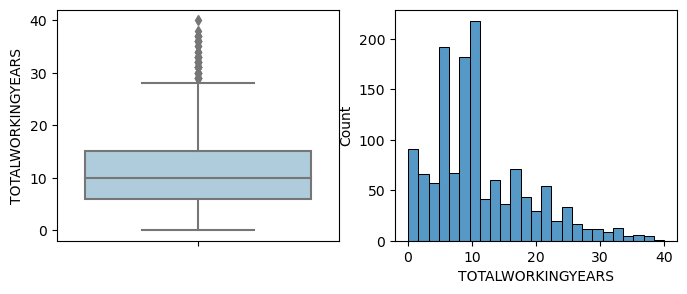


 ---------- TRAININGTIMESLASTYEAR ----------
       TRAININGTIMESLASTYEAR
count                1340.00
mean                    2.79
std                     1.26
min                     0.00
25%                     2.00
50%                     3.00
75%                     3.00
max                     6.00


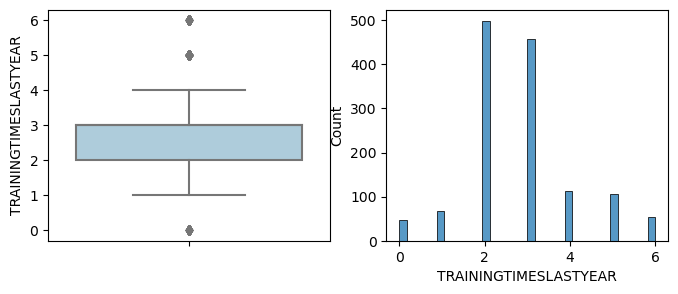


 ---------- WORKLIFEBALANCE ----------
       WORKLIFEBALANCE
count          1340.00
mean              2.77
std               0.70
min               1.00
25%               2.00
50%               3.00
75%               3.00
max               4.00


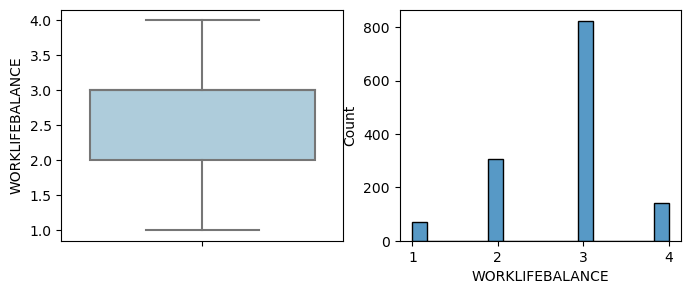


 ---------- YEARSATCOMPANY ----------
       YEARSATCOMPANY
count         1340.00
mean             7.07
std              6.04
min              0.00
25%              3.00
50%              5.00
75%             10.00
max             40.00


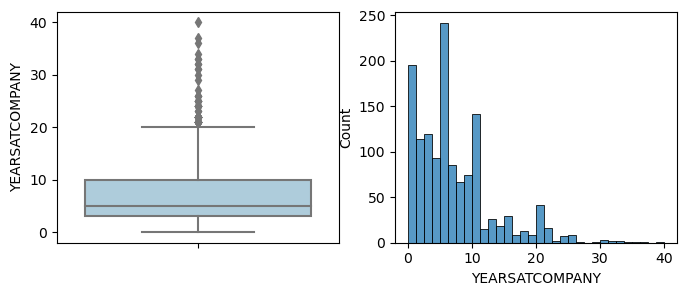


 ---------- YEARSINCURRENTROLE ----------
       YEARSINCURRENTROLE
count             1340.00
mean                 4.27
std                  3.68
min                  0.00
25%                  2.00
50%                  3.00
75%                  7.00
max                 18.00


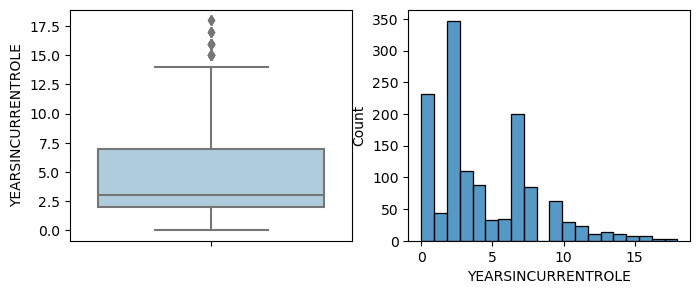


 ---------- YEARSSINCELASTPROMOTION ----------
       YEARSSINCELASTPROMOTION
count                  1340.00
mean                      2.18
std                       3.22
min                       0.00
25%                       0.00
50%                       1.00
75%                       3.00
max                      15.00


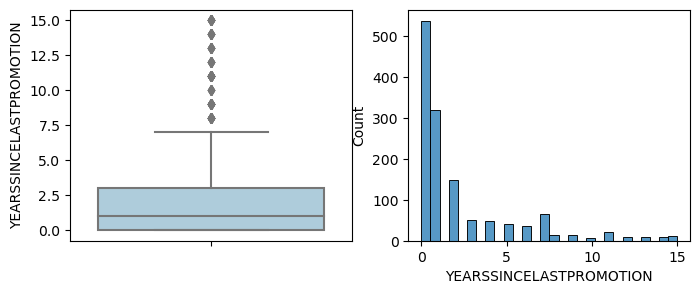


 ---------- YEARSWITHCURRMANAGER ----------
       YEARSWITHCURRMANAGER
count               1340.00
mean                   4.17
std                    3.58
min                    0.00
25%                    2.00
50%                    3.00
75%                    7.00
max                   17.00


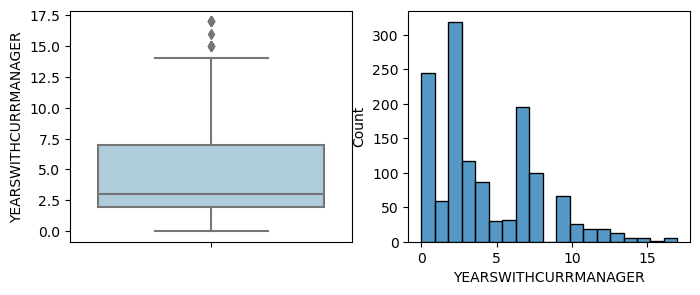

In [578]:
for n in nums:
    DescribeNumericalData(dataframe=train, cols=n, plot=True)

## Drop useless columns

In [579]:
train1 = train.copy()
test1 = test.copy()
# drop 'EmployeeID','STANDARDHOURS', 'EmployeeCount','Over18'
# all are over 18
# employee count is always 1
# standard hours is always 80
# employee ID does not conribute to model estimation
train2 = train1.drop(columns=['EmployeeID','StandardHours', 'EmployeeCount','Over18'])

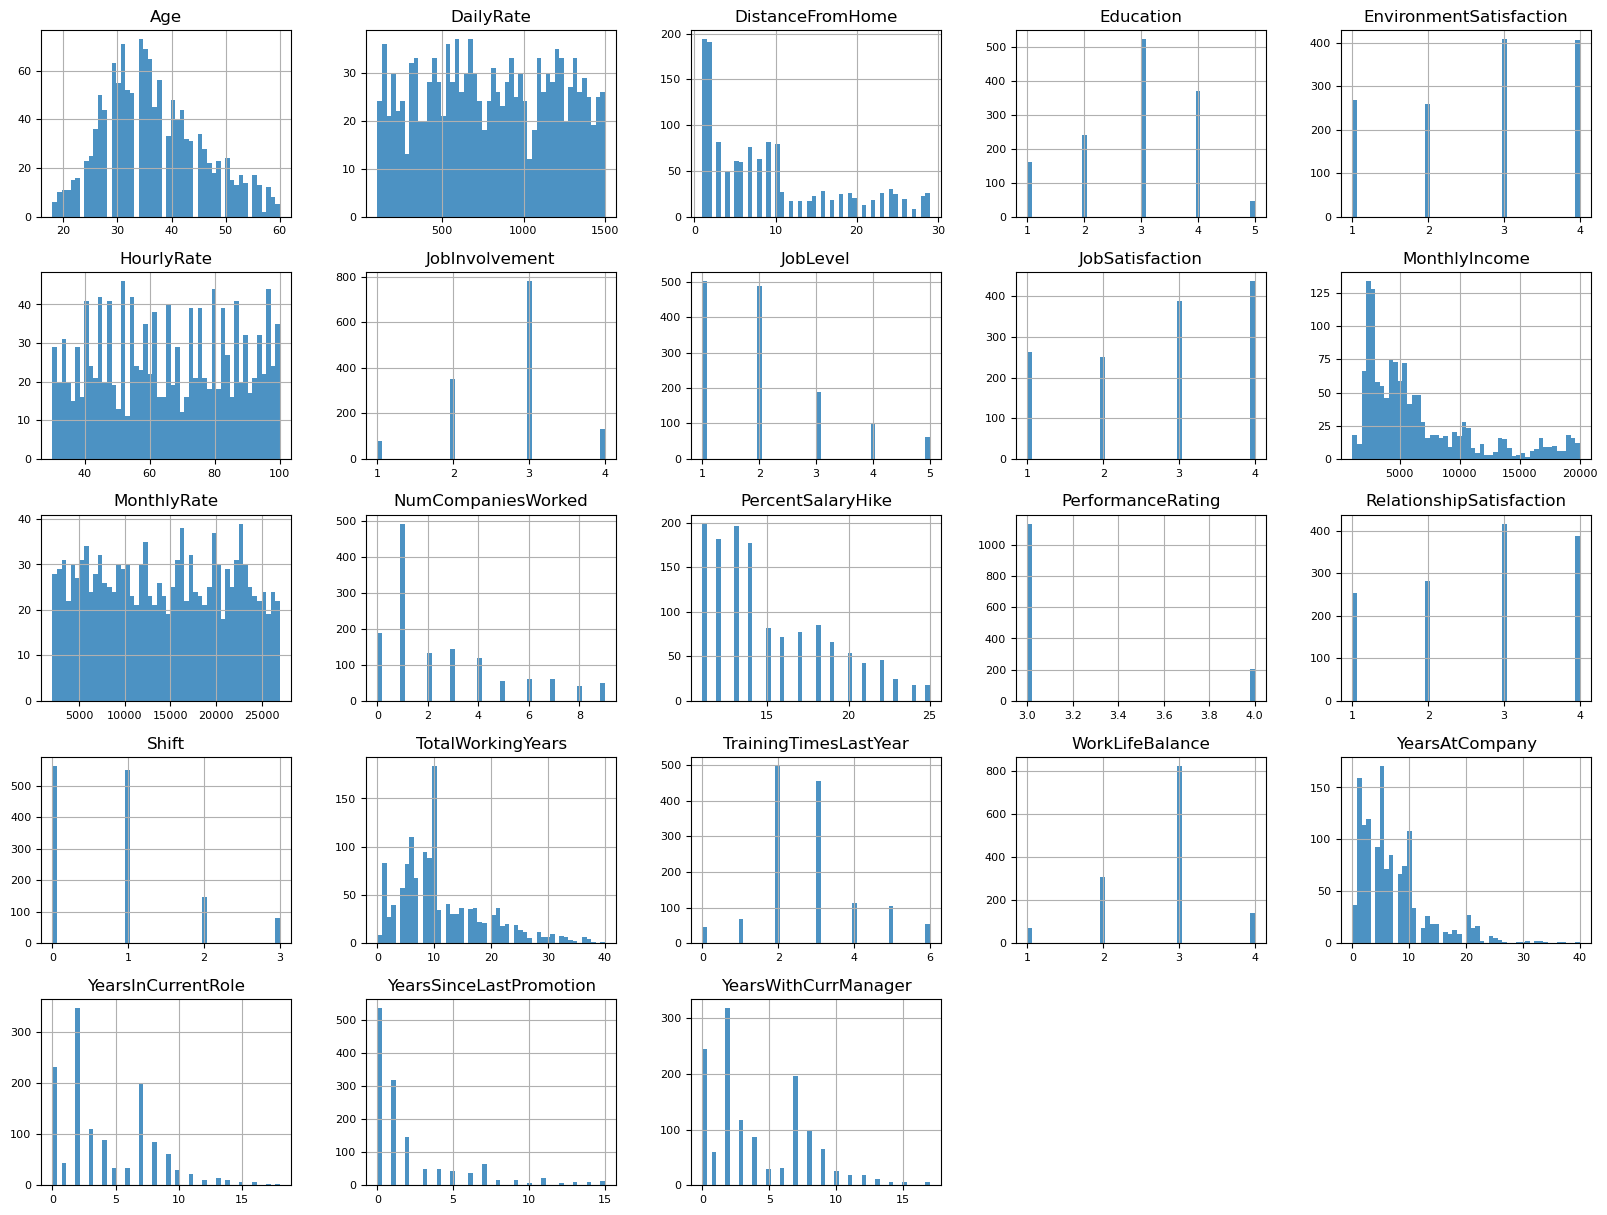

In [580]:
train2.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8, alpha=0.8);
plt.savefig('histogram.jpg')

# Feature engineering for training set
## Correlation analysis

In [581]:
corr = train2.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.020975,0.000607,0.199587,0.017541,0.012512,0.026383,0.514791,-0.004071,0.503040,...,0.007507,0.072620,0.049084,0.689935,-0.018912,0.008246,0.317609,0.227171,0.206832,0.220568
DailyRate,0.020975,1.000000,-0.008042,0.008677,0.027508,0.038069,0.058386,0.005532,0.031367,0.002385,...,-0.008770,0.007664,0.063753,0.016154,-0.003522,-0.025580,-0.028686,0.014549,-0.046705,-0.034934
DistanceFromHome,0.000607,-0.008042,1.000000,0.025367,-0.023335,0.024359,0.006783,-0.004097,-0.003573,-0.023226,...,0.008568,0.019937,0.019034,-0.006765,-0.043962,-0.036017,-0.001233,0.008017,0.016755,0.002349
Education,0.199587,0.008677,0.025367,1.000000,-0.021180,0.002358,0.041699,0.088887,0.000891,0.080942,...,-0.029331,0.021160,0.005581,0.133415,0.013331,0.019499,0.046436,0.045766,0.051384,0.044655
EnvironmentSatisfaction,0.017541,0.027508,-0.023335,-0.021180,1.000000,-0.043515,-0.010156,0.016002,0.011179,0.012804,...,-0.052481,-0.004841,0.018550,0.014690,-0.016828,0.029261,0.017907,0.018269,0.021116,0.002280
HourlyRate,0.012512,0.038069,0.024359,0.002358,-0.043515,1.000000,0.047835,-0.027786,-0.084491,-0.021546,...,-0.006252,-0.007482,0.077842,0.002306,-0.028468,-0.009010,-0.009903,-0.007183,-0.035839,-0.024532
JobInvolvement,0.026383,0.058386,0.006783,0.041699,-0.010156,0.047835,1.000000,-0.037257,-0.035506,-0.042262,...,-0.007106,0.058410,0.046803,-0.019061,-0.053513,-0.007909,-0.023004,0.003103,-0.018963,0.021850
JobLevel,0.514791,0.005532,-0.004097,0.088887,0.016002,-0.027786,-0.037257,1.000000,0.004568,0.950919,...,-0.017882,0.036756,0.007292,0.776386,-0.005470,0.024880,0.522177,0.378406,0.322288,0.377291
JobSatisfaction,-0.004071,0.031367,-0.003573,0.000891,0.011179,-0.084491,-0.035506,0.004568,1.000000,-0.002770,...,0.001423,-0.021159,0.029660,-0.006408,-0.022775,-0.005416,0.014671,0.003035,-0.010505,-0.020295
MonthlyIncome,0.503040,0.002385,-0.023226,0.080942,0.012804,-0.021546,-0.042262,0.950919,-0.002770,1.000000,...,-0.016641,0.035493,0.000180,0.764978,-0.008406,0.016183,0.499958,0.356286,0.314498,0.344793


['MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

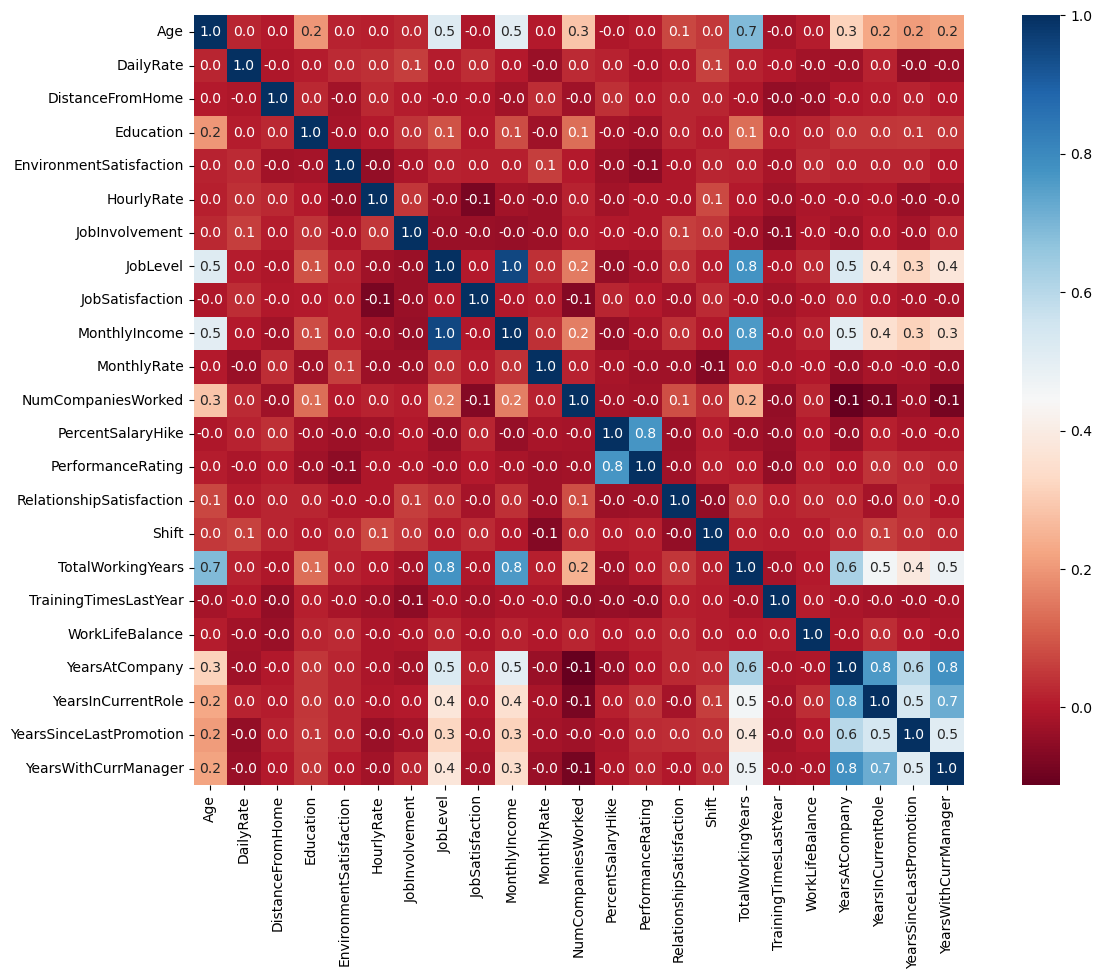

In [582]:
def CorrAnalysis(dataframe, corr_threshold=0.7, plot=False):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(
        np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns 
                 if any(upper_triangle_matrix[col] > corr_threshold)]

    if plot == True:
        plt.figure(figsize=(15, 10))
        sns.heatmap(corr, cmap='RdBu', square=True, annot=True, fmt='.1f')
#         plt.show()
        plt.savefig('corr.jpg')

    return drop_list

CorrAnalysis(train2, plot=True)  

In [583]:
features_to_drop = ['MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager']
train3 = train2.drop(columns=features_to_drop)
train3.shape
train3.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'Shift', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

## Encoding Categorical data

In [584]:
train3c = train3.copy()
cates1 = list(set(cates).intersection(set(train3c.columns)))
cates1

['Gender',
 'OverTime',
 'MaritalStatus',
 'BusinessTravel',
 'JobRole',
 'Department',
 'EducationField',
 'Attrition']

In [585]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(train3c[cates1[-3]])

array([0, 1, 0, ..., 1, 0, 1])

In [586]:
def LabelEncoder1(dataframe, feature_list):
    
    for f in feature_list:
        le = LabelEncoder()
        encoded = le.fit_transform(dataframe[f])
        dataframe[f] = encoded
    
    return dataframe


In [587]:
df = LabelEncoder1(dataframe=train3c, feature_list=cates1)

In [588]:
df.columns
train.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [589]:

# def Encoding(dataframe, feature, drop_first=True):
    
#     dum = pd.get_dummies(dataframe[feature], prefix=feature, drop_first=True)
# #     dataframe = pd.concat([dataframe, dum], axis=1)
#     cols = dum.columns
#     values = dum.values
#     dataframe[cols] = values
    
    
#     if drop_first == False:
#         dum = pd.get_dummies(dataframe[feature], prefix=feature, drop_first=False)
#         cols = dum.columns
#         values = dum.values
#         dataframe[cols] = values
    
#     return dataframe

In [590]:
# cates1 = list(set(cates).intersection(set(train3c.columns)))
# for f in cates1:
#     df = Encoding(train3c, f)

# df    

In [591]:
# trainf = df.drop(columns = cates1)
# X_train = trainf.drop(columns='Attrition_Yes')
# y_train = trainf['Attrition_Yes']

## Outlier detection

In [592]:
def DetectOutlier(dataframe, features, drop=False):
    '''
    Detect outliers using quantile method
    Feature: numerical variables, can be passed as int, float or list
    '''
    for feature in features:
        
        IQR = dataframe[feature].quantile(0.75) - dataframe[feature].quantile(0.25)
        lower = dataframe[feature].quantile(0.25) - (IQR * 2.5)
        upper = dataframe[feature].quantile(0.75) + (IQR * 2.5)
        out_of_bound = dataframe[feature].loc[(dataframe[feature] < lower) 
                                              | (dataframe[feature] > upper)]
        oob_idx = list(out_of_bound.index)
    
        if len(oob_idx) != 0:
            print('Feature {feature} has outliers.'.format(feature=feature))
            print('Outliers index of feature {feature} are: \n'.format(feature=feature), oob_idx)
            print('Outliers range of feature {feature} are < {lower} or > {upper}\n'.format(
                feature=feature, lower=lower, upper=upper))

        if drop == True:
            dataframe = dataframe.drop(index=oob_idx)
        
    return dataframe
        
        
#     return df

In [593]:
nums1 = list(set(nums).intersection(set(train3c.columns)))

In [594]:
df_o = DetectOutlier(dataframe=df, features=nums1, drop=True)

Feature TrainingTimesLastYear has outliers.
Outliers index of feature TrainingTimesLastYear are: 
 [27, 61, 64, 81, 114, 150, 197, 221, 225, 229, 235, 238, 244, 264, 268, 305, 310, 319, 331, 334, 419, 452, 495, 525, 572, 661, 667, 685, 705, 708, 776, 790, 817, 851, 860, 890, 941, 943, 954, 957, 1016, 1018, 1069, 1091, 1116, 1177, 1243, 1250, 1253, 1283, 1289, 1295, 1304, 1335]
Outliers range of feature TrainingTimesLastYear are < -0.5 or > 5.5

Feature YearsSinceLastPromotion has outliers.
Outliers index of feature YearsSinceLastPromotion are: 
 [4, 32, 76, 84, 109, 111, 135, 140, 149, 178, 179, 184, 188, 207, 251, 257, 262, 278, 279, 289, 291, 296, 314, 335, 383, 387, 414, 428, 430, 441, 442, 457, 458, 461, 463, 498, 538, 544, 552, 567, 586, 607, 616, 618, 630, 638, 649, 658, 659, 669, 702, 726, 798, 811, 819, 836, 853, 858, 859, 870, 893, 898, 911, 925, 933, 1001, 1008, 1038, 1049, 1059, 1075, 1092, 1101, 1103, 1122, 1127, 1135, 1137, 1144, 1149, 1156, 1166, 1170, 1171, 1197, 1199, 1

## Feature Selection

In [595]:
from sklearn.feature_selection import SelectKBest, chi2

X_ = df_o.drop(columns='Attrition')
y_ = df_o['Attrition'] 
slkb = SelectKBest(score_func=chi2,k=20)
X1 = slkb.fit_transform(X_, y_)

cols = slkb.get_support(indices=True)
# col_names = df_o.iloc[:,cols].columns
df_new = pd.DataFrame(X1)
# df_new.columns = col_names
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,40,2,1398,0,2,3,79,3,5,3,1,13022,0,0,4,0,2,3,20,1
1,40,2,1300,1,24,1,62,3,2,4,0,24447,1,0,1,2,3,3,9,4
2,25,2,622,0,13,2,40,3,1,3,1,26376,1,0,3,0,1,3,7,0
3,33,2,922,1,1,1,95,4,4,3,0,22578,4,0,3,1,2,3,6,0
4,27,0,210,0,1,3,73,3,2,2,1,22107,0,1,4,1,0,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,47,2,983,2,2,1,65,3,2,4,0,7389,5,0,3,3,2,3,5,0
1174,56,2,1162,2,24,1,97,3,1,4,2,10261,1,0,4,0,3,3,4,1
1175,29,2,1328,1,2,3,76,3,1,2,1,4956,0,0,4,1,3,3,5,0
1176,27,2,1377,0,2,4,74,3,2,3,2,5242,1,1,1,0,3,3,5,0


In [596]:
# df_o.iloc[:,cols].columns

## Scaling numerical data

In [597]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

nums2 = list(set(nums).intersection(set(df_new.columns)))

In [598]:
def ScaleData(data, feature, scaler, inplace=False):
    
    if scaler == 'MinMax':
        min_ = np.min(data[feature])
        max_ = np.max(data[feature])

        if inplace == True:
            data[feature] = (data[feature] - min_) / (max_ - min_)
            
    if scaler == 'Standard':
        mu = np.mean(data[feature])
        std = np.std(data[feature])
        
        if inplace == True:
            data[feature] = (data[feature] - mu) / std
        
    return data

In [599]:
for f in df_new.columns:
    ScaleData(df_new, f, 'Standard', inplace=True)
    
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.435075,0.590931,1.493889,-1.269315,-0.891094,0.267675,0.644409,0.370077,2.924349,0.229165,-0.134157,-0.167074,-1.063120,-0.647516,1.207414,-0.947445,-0.593955,0.322940,3.016916,-0.223432
1,0.435075,0.590931,1.249140,0.143968,1.833491,-1.554992,-0.192270,0.370077,0.054410,1.132029,-1.508386,1.433512,-0.661080,-0.647516,-1.568774,1.412154,0.319464,0.322940,0.642739,1.297973
2,-1.247152,0.590931,-0.444125,-1.269315,0.471199,-0.643658,-1.275031,0.370077,-0.902236,0.229165,-0.134157,1.703756,-0.661080,-0.647516,0.282018,-0.947445,-1.507374,0.322940,0.211070,-0.730567
3,-0.349964,0.590931,0.305108,0.143968,-1.014938,-1.554992,1.431872,1.767354,1.967703,0.229165,-1.508386,1.171675,0.545041,-0.647516,0.282018,0.232354,-0.593955,0.322940,-0.004764,-0.730567
4,-1.022855,-2.448879,-1.473070,-1.269315,-1.014938,0.267675,0.349111,0.370077,0.054410,-0.673699,-0.134157,1.105690,-1.063120,1.544363,1.207414,0.232354,-2.420792,0.322940,-0.220598,-0.223432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1.220115,0.590931,0.457451,1.557251,-0.891094,-1.554992,-0.044621,0.370077,0.054410,1.132029,-1.508386,-0.956230,0.947081,-0.647516,0.282018,2.591953,-0.593955,0.322940,-0.220598,-0.730567
1174,2.229452,0.590931,0.904493,1.557251,1.833491,-1.554992,1.530304,0.370077,-0.902236,1.132029,1.240073,-0.553877,-0.661080,-0.647516,1.207414,-0.947445,0.319464,0.322940,-0.436432,-0.223432
1175,-0.798558,0.590931,1.319069,0.143968,-0.891094,0.267675,0.496760,0.370077,-0.902236,-0.673699,-0.134157,-1.297081,-1.063120,-0.647516,1.207414,0.232354,0.319464,0.322940,-0.220598,-0.730567
1176,-1.022855,0.590931,1.441443,-1.269315,-0.891094,1.179009,0.398327,0.370077,0.054410,0.229165,1.240073,-1.257014,-0.661080,1.544363,-1.568774,-0.947445,0.319464,0.322940,-0.220598,-0.730567


# Model training
## Train models

In [600]:
X = df_new
y = y_
X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size = 0.1, random_state = 2022)

In [601]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
596,1.556560,0.590931,1.016878,1.557251,2.328870,1.179009,0.398327,1.767354,-0.902236,0.229165,-0.134157,-1.529499,-0.661080,1.544363,0.282018,2.591953,0.319464,0.322940,3.016916,0.790838
973,0.322927,0.590931,-1.707830,1.557251,1.833491,-1.554992,-0.684434,0.370077,0.054410,1.132029,1.240073,-1.243285,1.751161,-0.647516,-1.568774,-0.947445,-0.593955,0.322940,0.211070,-0.223432
1082,-1.807895,0.590931,-0.748813,-1.269315,-0.891094,0.267675,-0.832083,-1.027200,-0.902236,0.229165,1.240073,1.097985,-0.661080,-0.647516,1.207414,-0.947445,0.319464,-1.107223,-0.868101,-0.730567
684,-1.135004,-0.928974,-0.561504,0.143968,-1.014938,-1.554992,0.250678,-2.424478,-0.902236,1.132029,-1.508386,-1.250570,0.143001,-0.647516,-1.568774,0.232354,-0.593955,0.322940,-0.868101,0.283703
321,-0.462113,0.590931,-0.496571,-1.269315,-0.271870,1.179009,1.530304,0.370077,0.054410,1.132029,-0.134157,1.278847,0.545041,-0.647516,0.282018,0.232354,0.319464,-1.107223,-0.436432,-0.730567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,1.220115,0.590931,-0.836223,0.143968,-1.014938,-1.554992,0.398327,0.370077,-0.902236,1.132029,-0.134157,-0.561722,1.751161,-0.647516,0.282018,0.232354,-0.593955,-1.107223,-0.004764,-0.223432
240,1.444412,0.590931,-0.838720,0.143968,0.842733,1.179009,0.398327,0.370077,-0.902236,-1.576564,-1.508386,1.502719,0.545041,1.544363,-0.643378,0.232354,-0.593955,-1.107223,-0.868101,0.283703
624,0.435075,-0.928974,-0.022057,0.143968,-0.891094,0.267675,-1.373464,1.767354,0.054410,-0.673699,-0.134157,-0.600108,-0.661080,-0.647516,1.207414,0.232354,-0.593955,0.322940,0.426905,0.790838
173,-1.583598,-2.448879,-0.856202,0.143968,2.081181,-0.643658,0.939708,-1.027200,-0.902236,0.229165,-0.134157,-0.549394,-0.661080,1.544363,-0.643378,-0.947445,-0.593955,-1.107223,-0.436432,-0.223432


In [602]:
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, roc_curve, f1_score

def TrainModelAndEval(model, X_train, X_test, y_train, y_test, 
                      plot_ROC=False, plot_confusion_mat=False):
    start = time.time()
    # train model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    # predict
    y_pred = model.predict(X_test)

    # training accuracy
    f1score = f1_score(y_train, y_train_pred)
    auc = roc_auc_score(y_train, y_train_pred)
    train_time = time.time() - start

    # test accuracy
    f1score_t = f1_score(y_test, y_pred)
    auc_t = roc_auc_score(y_test, y_pred)

    print('-------Training Accuracy--------')
    print('F1 score = {}'.format(f1score))
    print('AUC = {}'.format(auc))
    print('Training time = {} \n'.format(train_time))
    
    print("-------Testing Accuracy--------")
    print("F1 score of test set = {}".format(f1score_t))
    print("AUC of test set = {}".format(auc_t))
    
    if plot_ROC == True:
        probs = model.predict_proba(X_train)
        fpr, tpr, thresholds = roc_curve(y_test, probs) 
        plot_roc_cur(tpr, fpr)

    if plot_confusion_mat == True:
        plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

    return model, f1score_t, auc_t, train_time


In [603]:
from sklearn.svm import SVC

model_svc = SVC(kernel='linear')
TrainModelAndEval(model_svc, X_train, X_test, y_train, y_test)

-------Training Accuracy--------
F1 score = 0.6696035242290749
AUC = 0.7863508620907917
Training time = 0.05006289482116699 

-------Testing Accuracy--------
F1 score of test set = 0.6470588235294118
AUC of test set = 0.7515954835542463


(SVC(kernel='linear'),
 0.6470588235294118,
 0.7515954835542463,
 0.05006289482116699)

In [604]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, f1_score_dt, auc_dt, train_time_dt = TrainModelAndEval(
                                    model_dt, X_train, X_test, y_train, y_test)

-------Training Accuracy--------
F1 score = 0.9880478087649402
AUC = 0.9881889763779528
Training time = 0.00969386100769043 

-------Testing Accuracy--------
F1 score of test set = 0.41025641025641024
AUC of test set = 0.6389297987236132


In [605]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 10,
             'min_samples_leaf': 2,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 2022}

model_rf = RandomForestClassifier(**params_rf)
model_rf, f1_score_rf, auc_rf, train_time_rf = TrainModelAndEval(
                                    model_rf, X_train, X_test, y_train, y_test)

-------Training Accuracy--------
F1 score = 0.9145299145299145
AUC = 0.921259842519685
Training time = 0.24555182456970215 

-------Testing Accuracy--------
F1 score of test set = 0.42857142857142855
AUC of test set = 0.6377025036818851


In [606]:
# import lightgbm as lgb
# params_lgb ={'colsample_bytree': 0.95, 
#          'max_depth': 16, 
#          'min_split_gain': 0.1, 
#          'n_estimators': 200, 
#          'num_leaves': 50, 
#          'reg_alpha': 1.2, 
#          'reg_lambda': 1.2, 
#          'subsample': 0.95, 
#          'subsample_freq': 20}

# model_lgb = lgb.LGBMClassifier(**params_lgb)
# model_lgb, f1_score_lgb, auc_lgb, train_time_lgb = TrainModelAndEval(
#                                     model_lgb, X_train, X_test, y_train, y_test)

In [607]:
from sklearn.ensemble import GradientBoostingClassifier

params_gb = {'max_depth': 15,
            'max_leaf_nodes': 150,
            'learning_rate': 1}
model_gb = GradientBoostingClassifier(**params_gb)
model_gb, f1_score_gb, auc_gb, train_time_gb = TrainModelAndEval(
                                     model_gb, X_train, X_test, y_train, y_test)

-------Training Accuracy--------
F1 score = 0.9880478087649402
AUC = 0.9881889763779528
Training time = 0.49271607398986816 

-------Testing Accuracy--------
F1 score of test set = 0.6857142857142857
AUC of test set = 0.7754050073637702


In [608]:
from sklearn.ensemble import AdaBoostClassifier

params_ada = {'n_estimators': 100}
model_ada = AdaBoostClassifier(**params_ada)
model_ada, f1_score_ada, auc_ada, train_time_ada = TrainModelAndEval(
                                     model_ada, X_train, X_test, y_train, y_test)

-------Training Accuracy--------
F1 score = 0.8907563025210083
AUC = 0.9146433062426682
Training time = 0.2304530143737793 

-------Testing Accuracy--------
F1 score of test set = 0.7058823529411765
AUC of test set = 0.780559646539028


## Hyperparameter tuning

In [609]:
from sklearn.model_selection import GridSearchCV


params = {'n_estimators': [10, 25, 50, 75, 100, 200, 300, 500],
         'learning_rate': [0.001, 0.01, 0.1, 0.5, 1., 5, 10, 20, 50, 100]}

adaboost = AdaBoostClassifier()
clf = GridSearchCV(adaboost, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 5, 10,
                                           20, 50, 100],
                         'n_estimators': [10, 25, 50, 75, 100, 200, 300, 500]})

In [610]:
best_params = clf.best_params_
print(best_params)
model_ada_b = AdaBoostClassifier(**best_params)
model_ada_b, f1_score_ada_b, auc_ada_b, train_time_ada_b = TrainModelAndEval(
                                     model_ada_b, X_train, X_test, y_train, y_test)

{'learning_rate': 1.0, 'n_estimators': 100}
-------Training Accuracy--------
F1 score = 0.8907563025210083
AUC = 0.9146433062426682
Training time = 0.2287130355834961 

-------Testing Accuracy--------
F1 score of test set = 0.7058823529411765
AUC of test set = 0.780559646539028


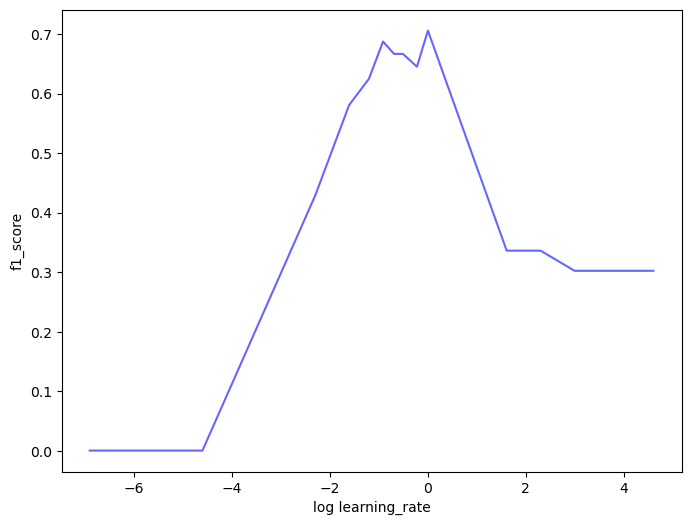

In [611]:
# plot f1 score VS learning rate

# lrate =  [0.001, 0.01, 0.1, 0.5, 1., 5, 10, 20, 50, 100]
lrate = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 5, 10, 20, 50, 100]

f1s = []
for l in lrate:
    ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate =l)
    ada_clf.fit(X_train, y_train)
    y_pred = ada_clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1s.append(f1)
    
fig1, ax1 = plt.subplots(figsize=(8,6))
log_lrate = np.log(lrate)
plt.plot(log_lrate, f1s, c='b',alpha=0.6)
plt.xlabel('log learning_rate')
plt.ylabel('f1_score')
plt.savefig('lrateADA.jpg')

In [612]:
paramgrid_rf = {'max_depth': [5, 10, 15, 20, 25],
             'min_samples_leaf': [i for i in np.linspace(0.01, 1, num = 8)],
             'min_samples_split': [i for i in np.linspace(0.01, 1, num = 8)],
             'n_estimators': [10,50,100],
             'criterion': ['gini', 'entropy', 'log_loss']
             }
rf_clf = RandomForestClassifier()
clf = GridSearchCV(rf_clf, paramgrid_rf)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# lrate =  [0.001, 0.01, 0.1, 0.5, 1., 5, 10, 20, 50, 100]
# splits = [i for i in np.linspace(0.01, 1, num = 8)]
depths = [int(i) for i in np.linspace(1, 100, num = 20)]

f1s_rf = []
for d in depths:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth =d)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    f1_rf = f1_score(y_test, y_pred)
    f1s_rf.append(f1_rf)
    
fig1, ax1 = plt.subplots(figsize=(8,6))
# log_split = np.log(lrate)
plt.plot(splits, f1s_rf, c='b',alpha=0.6)
plt.xlabel('max_depth')
plt.ylabel('f1_score')
plt.savefig('maxdepthRF.jpg')

In [ ]:
# best_rf = clf.best_params_
# model_rf_b = RandomForestClassifier(**best_rf)
# model_rf_b, f1_score_rf_b, auc_rf_b, train_time_rf_b = TrainModelAndEval(
#                                      model_rf_b, X_train, X_test, y_train, y_test)

In [ ]:
paramgrid_gb = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_leaf_nodes': [10, 50 ,100, 150, 200, 250, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1., 5, 10, 20, 50, 100]
}
gb_clf = GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, paramgrid_gb)
clf.fit(X_train, y_train)

In [ ]:
best_gb = clf.best_params_
model_gb_b = GradientBoostingClassifier(**best_gb)
model_gb_b, f1_score_gb_b, auc_gb_b, train_time_gb_b = TrainModelAndEval(
                                     model_gb_b, X_train, X_test, y_train, y_test)

# Feature engineering for test set

In [616]:
test

,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1628396,42,Travel_Rarely,855,Maternity,12,3,Medical,1,2,...,2,80,3,7,6,2,5,3,0,4
1,1658398,29,Travel_Rarely,906,Maternity,10,3,Life Sciences,1,4,...,3,80,0,3,5,3,0,0,0,0
2,1520532,38,Non-Travel,1327,Cardiology,2,2,Life Sciences,1,4,...,4,80,1,13,0,3,8,7,7,5
3,1410589,25,Travel_Rarely,240,Cardiology,5,3,Marketing,1,3,...,4,80,0,6,1,3,6,4,0,3
4,1309082,29,Travel_Rarely,352,Neurology,6,1,Medical,1,4,...,4,80,0,1,3,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1297098,59,Travel_Rarely,715,Neurology,2,3,Life Sciences,1,3,...,1,80,0,30,4,3,5,3,4,3
332,1212094,42,Travel_Rarely,265,Cardiology,5,2,Marketing,1,4,...,2,80,0,21,3,4,1,0,0,0
333,1639147,29,Travel_Rarely,1090,Cardiology,10,3,Marketing,1,4,...,4,80,2,2,2,3,2,2,2,2
334,1550660,34,Non-Travel,1381,Cardiology,4,4,Marketing,1,3,...,1,80,1,6,3,3,3,2,1,2


In [619]:
test1 = test.drop(columns=['EmployeeID','StandardHours', 'EmployeeCount','Over18'])
test2 = test1.drop(columns=features_to_drop)
test2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,Shift,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,42,Travel_Rarely,855,Maternity,12,3,Medical,2,Male,57,...,8952,8,No,22,2,3,6,2,5,0
1,29,Travel_Rarely,906,Maternity,10,3,Life Sciences,4,Female,92,...,11479,6,Yes,20,3,0,5,3,0,0
2,38,Non-Travel,1327,Cardiology,2,2,Life Sciences,4,Male,39,...,19682,3,No,18,4,1,0,3,8,7
3,25,Travel_Rarely,240,Cardiology,5,3,Marketing,3,Male,46,...,26959,1,Yes,11,4,0,1,3,6,0
4,29,Travel_Rarely,352,Neurology,6,1,Medical,4,Male,87,...,15434,1,No,11,4,0,3,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,59,Travel_Rarely,715,Neurology,2,3,Life Sciences,3,Female,69,...,21829,3,Yes,13,1,0,4,3,5,4
332,42,Travel_Rarely,265,Cardiology,5,2,Marketing,4,Male,90,...,7770,6,No,13,2,0,3,4,1,0
333,29,Travel_Rarely,1090,Cardiology,10,3,Marketing,4,Male,83,...,17967,1,No,14,4,2,2,3,2,2
334,34,Non-Travel,1381,Cardiology,4,4,Marketing,3,Female,72,...,12740,9,No,15,1,1,3,3,3,1


In [623]:
cates1[:-1]

['Gender',
 'OverTime',
 'MaritalStatus',
 'BusinessTravel',
 'JobRole',
 'Department',
 'EducationField']

In [624]:
test3 = LabelEncoder1(dataframe=test2, feature_list=cates1[:-1])

In [625]:
# slkb = SelectKBest(score_func=chi2,k=20)
test3 = slkb.transform(test2)
scaler = StandardScaler()

test4 = scaler.fit_transform(test3)
test4

array([[ 4.20759291e-01,  5.92019856e-01,  1.19428461e-01, ...,
        -1.04607089e+00, -2.98193870e-01, -7.06519077e-01],
       [-9.48746359e-01,  5.92019856e-01,  2.43686269e-01, ...,
         3.59848386e-01, -1.08836059e+00, -7.06519077e-01],
       [-6.27063026e-04, -2.35492343e+00,  1.26942229e+00, ...,
         3.59848386e-01,  1.75906163e-01,  1.44320003e+00],
       ...,
       [-9.48746359e-01,  5.92019856e-01,  6.91988949e-01, ...,
         3.59848386e-01, -7.72293903e-01, -9.23136180e-02],
       [-4.22013417e-01, -2.35492343e+00,  1.40098938e+00, ...,
         3.59848386e-01, -6.14260558e-01, -3.99416347e-01],
       [-1.05973651e-01,  5.92019856e-01,  5.14129734e-01, ...,
        -1.04607089e+00, -6.14260558e-01, -7.06519077e-01]])

In [ ]:
# cates_t = list(set(cates).intersection(set(test2.columns)))
# cates_t

# test_new = LabelEncoder1(test2, cates_t)

# test_new    

In [ ]:
# test3 = test_new.drop(columns=cates_t)
# test3

In [ ]:
# nums_test = list(set(nums).intersection(set(test3.columns)))
# test_noo = DetectOutlier(dataframe=test3, features=nums_test, drop=True)

In [ ]:
# for f in test_new.columns:
#     ScaleData(test_new, f, 'Standard', inplace=True)
# test_new

In [ ]:
# test4 = test3[col_names]
# test4


# Predict and submit

## Adaboost

In [626]:
y_pred_ada = model_ada.predict(test4)
y_pred_ada

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [ ]:
y_pred_rf = model_rf_b.predict(test4)
y_pred_rf

In [ ]:
# y_pred_gb = model_gb_b.predict(test4)
# y_pred_gb

In [627]:
ada = pd.DataFrame(y_pred_ada)
submit_ada = ada.reset_index()

submit_ada.columns=[['id','Predicted']]
submit_ada

,id,Predicted
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0
...,...,...
331,331,0
332,332,0
333,333,0
334,334,0


In [628]:
submit_ada.to_csv('submission_ada_01.csv', index=False)

In [ ]:
submit_rf = pd.DataFrame(y_pred_rf)
submit_rf = submit_rf.reset_index()

submit_rf.columns=[['id','Predicted']]
submit_rf

In [ ]:
submit_rf.to_csv('submission_rf_01.csv', index=False)